## Base figures plotting filtering event examples

In [1]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.style.use("/media/Data/E796v2/Python/actroot.mplstyle")
import numpy as np

import util as u
from importlib import reload


In [2]:
## General settings
figsize = (8.5, 3.5)
twocols = ["dodgerblue", "crimson"]
threecols = ["crimson", "dodgerblue", "darkorange"]
alw = 1.5

### Splitting recoils

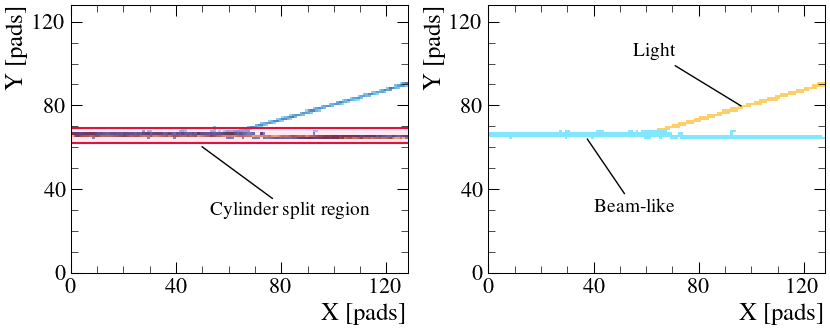

In [7]:
reload(u)
split = u.DataInterface("../Events/break_chi2.root")

fig = u.init_figure("split", figsize=figsize)
gs = fig.add_gridspec(1, 2, width_ratios=[1,1], height_ratios=[1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before
plt.sca(ax1)
split.draw()
# Add lines
ax1.plot([0, 128], [69, 69], color="crimson", lw=1.5)
ax1.plot([0, 128], [62, 62], color="crimson", lw=1.5)
ax1.fill_between([0, 128], 69, 62, color="hotpink", alpha=0.15)
ax1.annotate("Cylinder split region", xy=(49, 61), xytext=(53, 27),fontsize=14,
            arrowprops=dict(arrowstyle="-"))

splita = u.DataInterface("../Events/break_chi2_after.root")
plt.sca(ax2)
splita.draw(True)
ax2.annotate("Beam-like", xy=(37, 65), xytext=(40, 29), fontsize=14,
            arrowprops=dict(arrowstyle="-"))
ax2.annotate("Light", xy=(97, 79), xytext=(55, 103), fontsize=14,
            arrowprops=dict(arrowstyle="-"))

plt.tight_layout()
plt.show()

fig.savefig("./Outputs/split.pdf")

### Broken clusters

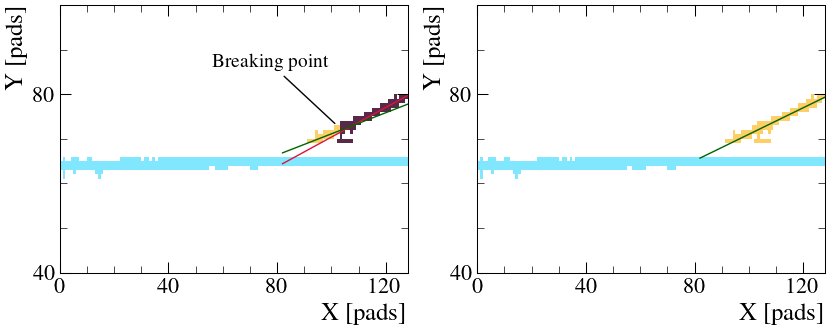

In [12]:
merge = u.DataInterface("../Events/merge_before.root")

fig = u.init_figure("merge", figsize=figsize)
gs = fig.add_gridspec(1, 2, width_ratios=[1,1], height_ratios=[1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before
plt.sca(ax1)
merge.draw(True)
xstart = 82
merge.draw_line(1, xstart, color="crimson")
merge.draw_line(2, xstart, color="darkgreen")
# Add lines
ax1.annotate("Breaking point", xy=(102, 73), xytext=(56, 86),fontsize=14,
            arrowprops=dict(arrowstyle="-"))

mergea = u.DataInterface("../Events/merge_after.root")
plt.sca(ax2)
mergea.draw(True)
mergea.draw_line(0, xstart, color="darkgreen")
# ax2.annotate("Beam-like", xy=(37, 65), xytext=(40, 29), fontsize=14,
#             arrowprops=dict(arrowstyle="-"))
# ax2.annotate("Light", xy=(97, 79), xytext=(55, 103), fontsize=14,
#             arrowprops=dict(arrowstyle="-"))

## Common settings for both
for ax in [ax1, ax2]:
    ax.set_ylim(40, 100)

plt.tight_layout()
plt.show()

fig.savefig("./Outputs/merge.pdf")

### Pileup and deltas

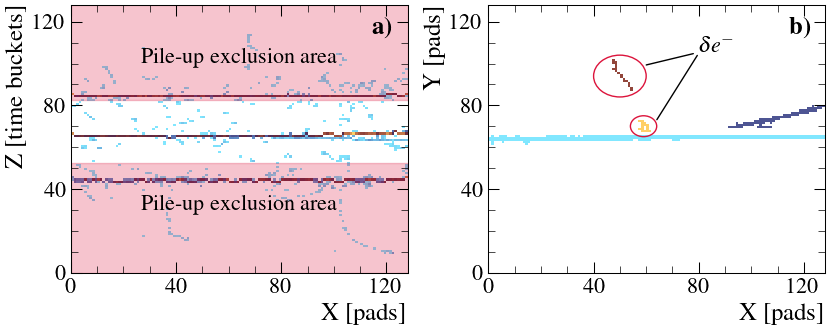

In [5]:
reload(u)
pileup = u.DataInterface("../Events/run_155_entry_1296.root")

fig = u.init_figure("pileup", figsize=figsize)

gs = fig.add_gridspec(1, 2, height_ratios=[1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Pileup
plt.sca(ax1)
pileup.draw(False, "xz")
# Draw exclusion regions
ax1.axhspan(82.5, 128, color="crimson", alpha=0.25)
ax1.axhspan(0, 52.5, color="crimson", alpha=0.25)
ax1.annotate("Pile-up exclusion area", xy=(64, 100), ha="center", fontsize=16)
ax1.annotate("Pile-up exclusion area", xy=(64, 30), ha="center", fontsize=16)
# Identify subplot
u.add_subplot_label("a)", 0.925, 0.91)

# Clean delta
plt.sca(ax2)
delta = u.DataInterface("../Events/clean_delta.root")
delta.draw(True)
# Delta electron
ax2.annotate(r"$\delta e^{-}$", xy=(59, 99), xytext=(80, 105),
            arrowprops=dict(arrowstyle="-"), fontsize=16)
c0 = mpl.patches.Circle((50, 94), 10, color="crimson", fill=False)
ax2.add_patch(c0)
# Noise
ax2.annotate("", xy=(63.5, 72), xytext=(80, 105),
            arrowprops=dict(arrowstyle="-"), fontsize=16)
c1 = mpl.patches.Circle((59, 70), 5, color="crimson", fill=False)
ax2.add_patch(c1)
u.add_subplot_label("b)", 0.925, 0.91)

plt.tight_layout()
plt.show()
plt.savefig("./Outputs/pileup_deltas.pdf")

### Fine treatment of event

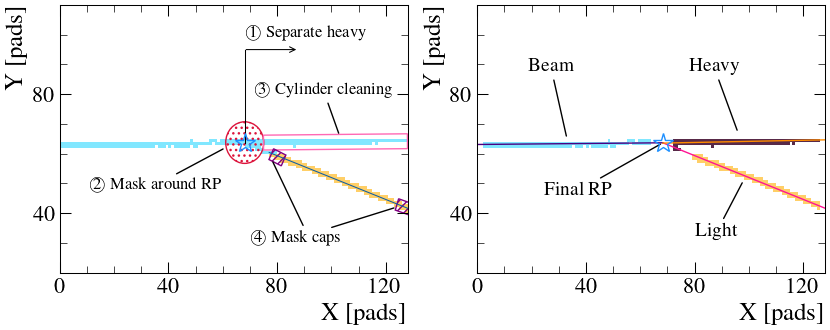

In [6]:
reload(u)
fineb = u.DataInterface("../Events/fine_before.root")

fig = u.init_figure("fine event", figsize=figsize)
gs = fig.add_gridspec(1, 2, height_ratios=[1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before
plt.sca(ax1)
fineb.draw(True)
fineb.draw_rp(c="dodgerblue", markersize=15, lw=2, zorder=4)
# 1 Break heavy
ybreak = 95
rp = (fineb.rp[0], fineb.rp[1])
ax1.plot([fineb.rp[0], fineb.rp[0]], [rp[1], ybreak], lw=0.75, color="black")
ax1.annotate("", xy=(fineb.rp[0] + 20, ybreak), xytext=(fineb.rp[0]-0.5, ybreak),
            arrowprops=dict(arrowstyle="->", lw=0.75))
ax1.annotate(r"\textcircled{1} Separate heavy", xy=(fineb.rp[0], ybreak + 4), fontsize=12)

# 2 Mask region around rp
crp = mpl.patches.Circle((fineb.rp[0], fineb.rp[1]), 7, ec="crimson", fc="none", hatch="...")
ax1.add_patch(crp)
ax1.annotate(r"\textcircled{2} Mask around RP", xy=(61,62), xytext=(35, 48), ha="center",
            arrowprops=dict(arrowstyle="-"), fontsize=12)
# 3 Cilynder cleaning
rect = mpl.patches.Rectangle((75, rp[1] - 2.5), width=53, height=5, angle=0.5, color="hotpink", fill=False, lw=1)
ax1.add_patch(rect)
ax1.annotate(r"\textcircled{3} Cylinder cleaning", xy=(103, 66), xytext=(97,80), fontsize=12, ha="center",
            arrowprops=dict(arrowstyle="-"))
# 4 Capping fit
fineb.draw_line(0, min=rp[0] + 9, lw=0.75)
cap0 = mpl.patches.Rectangle((77, 58), width=5, height=4, angle=-25, color="purple", 
                            ec="purple", fc="none", hatch="////")
cap1 = mpl.patches.Rectangle((123.5, 41), width=5, height=4, angle=-18, color="purple", 
                            ec="purple", fc="none", hatch="////")
ax1.add_patch(cap0)
ax1.add_patch(cap1)
ax1.annotate(r"\textcircled{4} Mask caps", xy=(124, 42), xytext=(70, 30), fontsize=12,
            arrowprops=dict(arrowstyle="-"))
ax1.annotate("", xy=(78, 58), xytext=(90, 35), fontsize=12,
            arrowprops=dict(arrowstyle="-"))
# fineb.draw_line(1)
# Set sizes
ax1.set_ylim(20, 110)

# -------------------------------------------------------
# After fine tuning
plt.sca(ax2)
finea = u.DataInterface("../Events/fine_after.root")
finea.change_id({0:0, 1:2, 2:1})
finea.draw(True)
finea.draw_rp(c="dodgerblue", markersize=15, lw=2, zorder=4)
finea.draw_line(0, finea.rp[0], color="deeppink") #light
finea.draw_line(1, 0, finea.rp[0], color="indigo") # beam
finea.draw_line(2, finea.rp[0], color="darkorange")# heavy
ax2.set_ylim(20, 110)

# Annotate
ax2.annotate("Beam", xy=(33, 65), xytext=(27, 88), fontsize=14, ha="center",
            arrowprops=dict(arrowstyle="-"))
ax2.annotate("Heavy", xy=(96, 67), xytext=(87, 88), fontsize=14, ha="center",
            arrowprops=dict(arrowstyle="-"))
ax2.annotate("Light", xy=(98, 51), xytext=(88, 32), fontsize=14, ha="center",
            arrowprops=dict(arrowstyle="-"))
ax2.annotate("Final RP", xy=(finea.rp[0], finea.rp[1]), xytext=(37, 46), fontsize=14, ha="center",
            arrowprops=dict(arrowstyle="-"))

plt.tight_layout()
plt.show()
plt.savefig("./Outputs/fine.pdf")